In [304]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import itertools
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_similarity_score # Jaccard Similarity

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as sm
from sklearn import metrics
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import itertools
import collections
from sklearn.metrics import jaccard_similarity_score # Jaccard Similarity
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifierCV


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn import metrics
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import csv
import seaborn as sns
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import requests;
import json;
import unicodecsv as csv
%matplotlib inline

In [305]:
# Data preparation and analysis 
# Load dataset
df = pd.read_csv("movietraining.csv") #Reading the dataset in a dataframe using Pandas
df.tail()

,Gender,Age,Status,State,movieinaday,genre,moviename,rating,watchmovie,favoriteactororactressisinthemovie,movieplatform,languagemovie
395,Female,14 - 19,Student,Wilayah Persekutuan,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,Ejen Ali The Movie,4,3 times,Yes,Online sites,English
396,Female,20 - 29,Student,Kedah,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,Exit (2019),4,Once,No,Online sites,English
397,Female,14 - 19,Student,Kedah,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,Crazy Rich Asian,4,3 times,Yes,Online sites,English
398,Female,20 - 29,Student,Wilayah Persekutuan,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,Baby Driver (2017),4,3 times,No,Online sites,English
399,Male,20 - 29,Student,Kedah,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,The Lion King (2019),4,3 times,Yes,Online sites,English


In [306]:

Counter(df['genre'])

Counter({'Action;Adventure;Comedy;Crime;Mystery;Romance;Thriller': 3,
         'Thriller': 28,
         'Comedy': 6,
         'Action;Adventure;Animation;Crime;Fantasy;Live Action;Romance;Sci-fi': 11,
         'Action;Adventure;Animation;Comedy;Crime;Horror;Mystery;Romance;Sci-fi;Thriller': 19,
         'Action;Adventure;Animation;Comedy;Crime;Drama;Fantasy;Horror;Live Action;Mystery;Romance;Sci-fi;Thriller': 5,
         'Action;Adventure;Comedy;Fantasy;Horror;Sci-fi': 2,
         'Action;Adventure;Comedy;Crime;Romance;Sci-fi': 2,
         'Action;Adventure;Fantasy;Thriller': 1,
         'Action;Adventure;Animation;Comedy;Fantasy': 4,
         'Adventure;Animation;Crime;Fantasy;Horror;Thriller': 1,
         'Action;Adventure;Comedy;Crime;Fantasy;Horror;Mystery;Sci-fi;Thriller': 1,
         'Action;Adventure;Comedy;Crime;Fantasy;Live Action;Mystery;Sci-fi;Thriller': 1,
         'Action;Adventure;Animation;Comedy;Crime;Drama;Fantasy;Romance;Sci-fi;Thriller': 2,
         'Action;Adventure

In [307]:
df.shape

(400, 12)

In [308]:
df.columns

Index(['Gender', 'Age', 'Status', 'State', 'movieinaday', 'genre', 'moviename',
       'rating', 'watchmovie', 'favoriteactororactressisinthemovie',
       'movieplatform', 'languagemovie'],
      dtype='object')

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Gender                                400 non-null object
Age                                   400 non-null object
Status                                400 non-null object
State                                 400 non-null object
movieinaday                           400 non-null object
genre                                 400 non-null object
moviename                             400 non-null object
rating                                400 non-null int64
watchmovie                            400 non-null object
favoriteactororactressisinthemovie    400 non-null object
movieplatform                         400 non-null object
languagemovie                         400 non-null object
dtypes: int64(1), object(11)
memory usage: 37.6+ KB


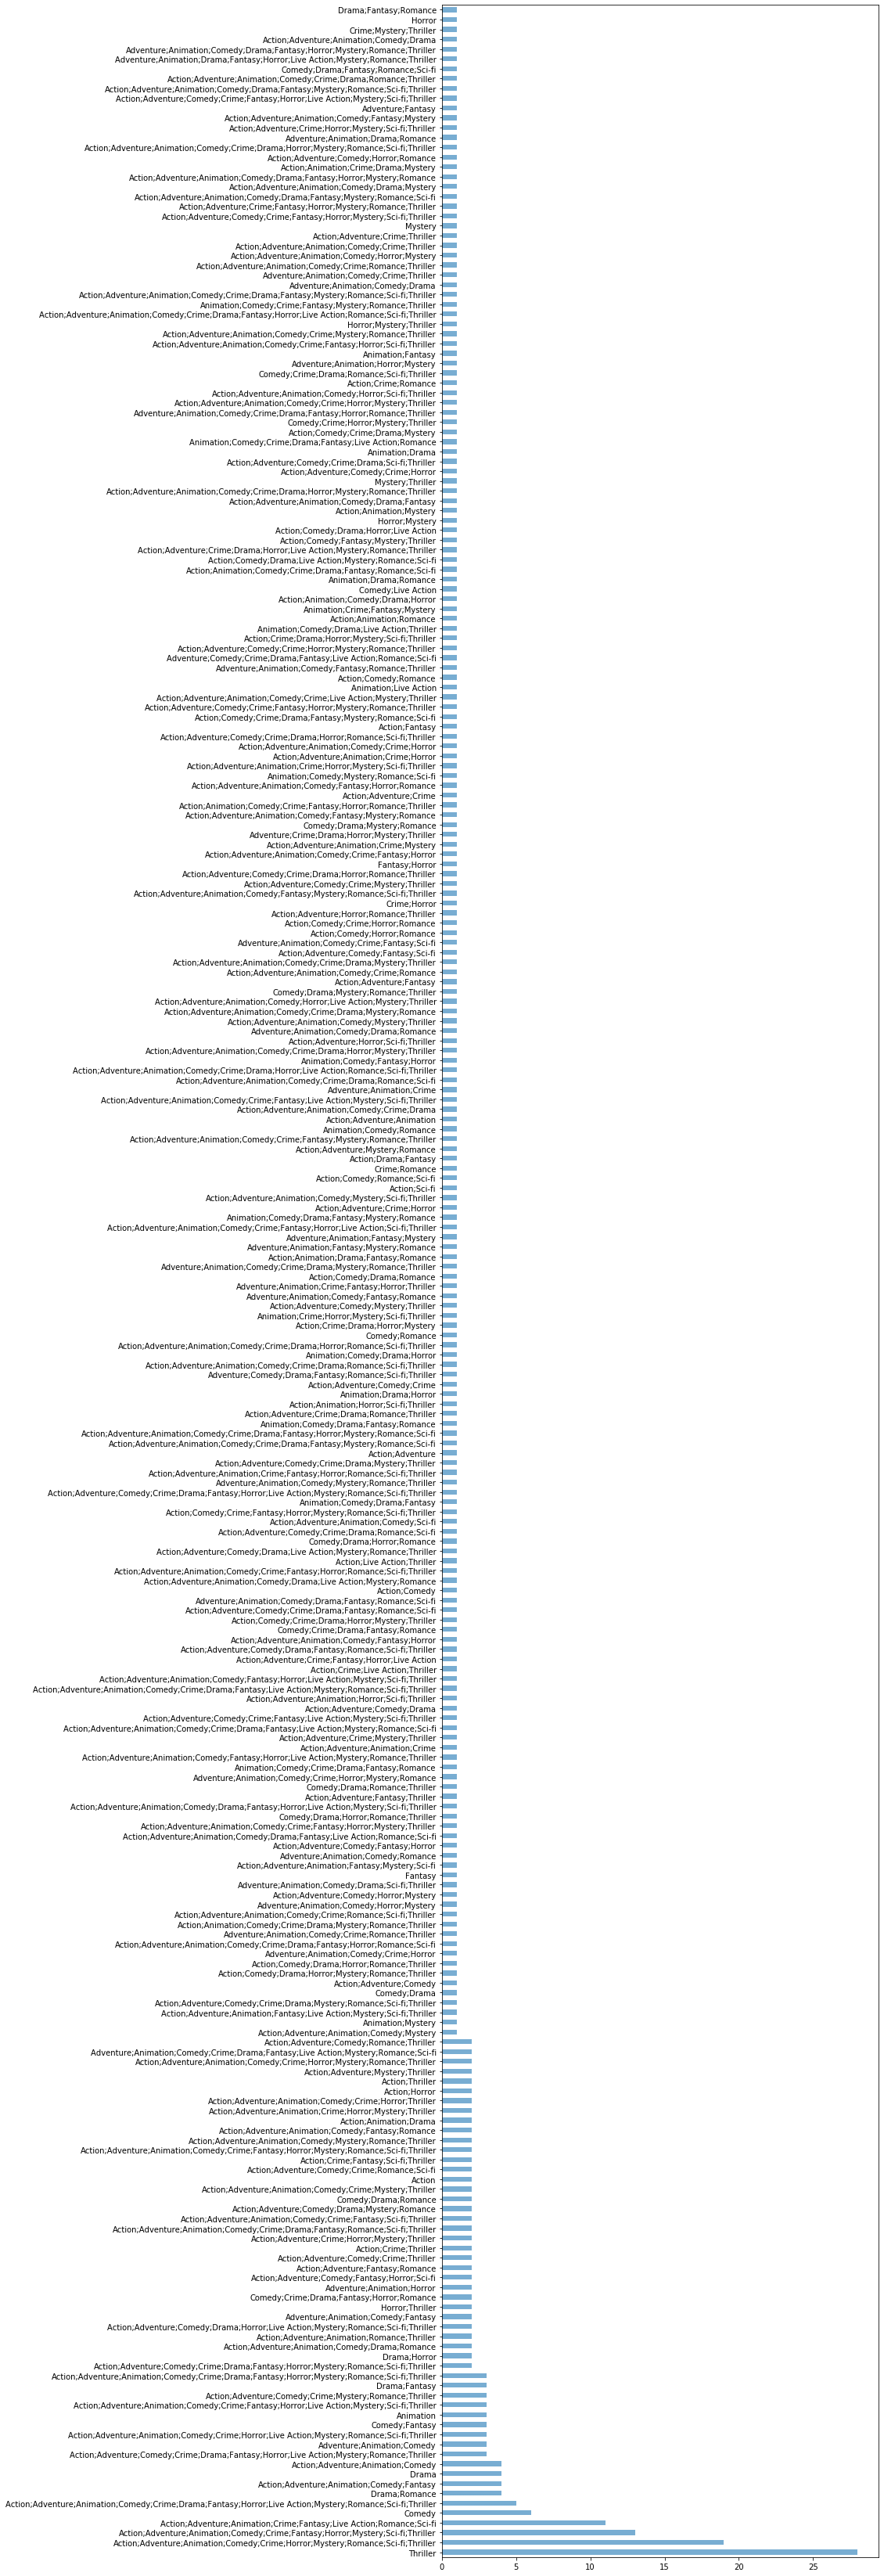

In [310]:
#DATA ANALYSIS/ DATA SELECTION
df['genre'].value_counts().plot(kind='barh',alpha=0.6,figsize=(10,60))
plt.show()

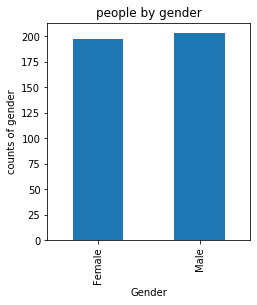

In [311]:
temp1 = df['Gender'].value_counts(ascending=True)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.xlabel('Gender')
plt.ylabel('counts of gender')
plt.title("people by gender")
temp1.plot(kind='bar')



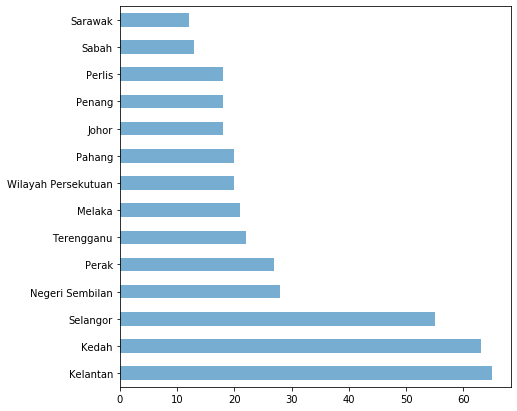

In [312]:
df['State'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

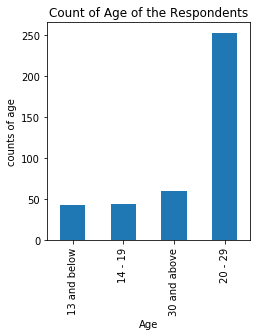

In [313]:
temp2 = df['Age'].value_counts(ascending=True)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.xlabel('Age')
plt.ylabel('counts of age')
plt.title("Count of Age of the Respondents")
temp2.plot(kind='bar')

Text(0.5, 1.0, 'The frequecy of movie watch based on favourite movie')

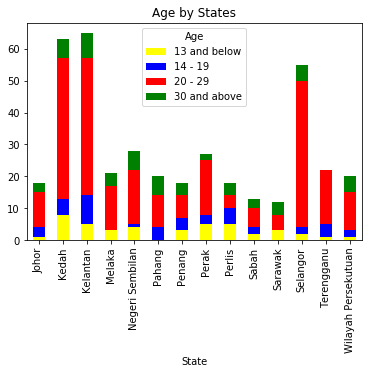

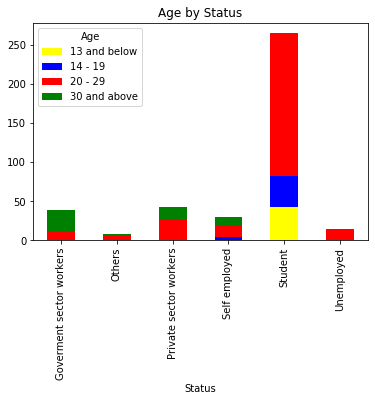

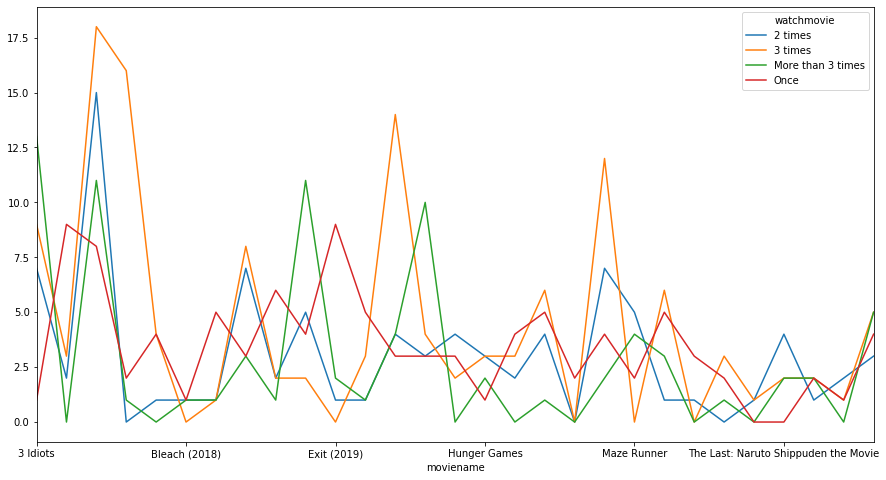

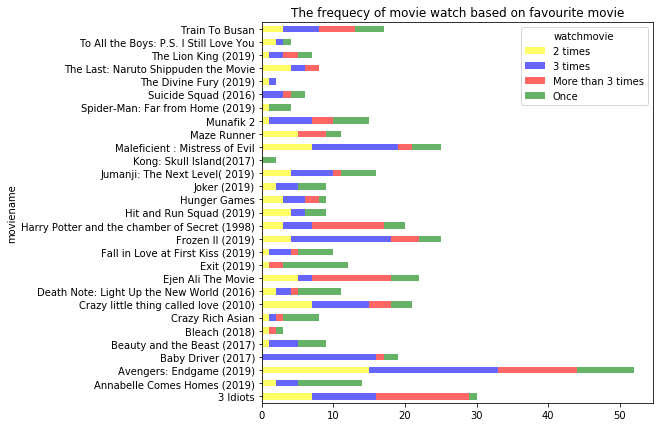

In [314]:
temp3 = pd.crosstab(df['State'],df['Age'])

temp3.plot(kind='bar',stacked=True, color=['yellow','blue','red','green'], grid=False)

plt.title('Age by States')


temp3 = pd.crosstab(df['Status'],df['Age'])

temp3.plot(kind='bar',stacked=True, color=['yellow','blue','red','green'], grid=False)

plt.title('Age by Status')

temp3 = pd.crosstab(df['moviename'],df['watchmovie'])
temp3.plot(figsize=(15,8))
temp3.plot(kind='barh',stacked=True, color=['yellow','blue','red','green'], grid=False,alpha=0.6,figsize=(7,7))

plt.title('The frequecy of movie watch based on favourite movie')

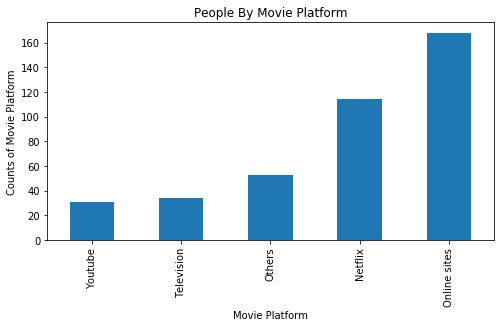

In [315]:
temp4 = df['movieplatform'].value_counts(ascending=True)


plt.figure(figsize=(8,4))
plt.xlabel('Movie Platform')
plt.ylabel('Counts of Movie Platform')
plt.title('People By Movie Platform')
temp4.plot(kind='bar')

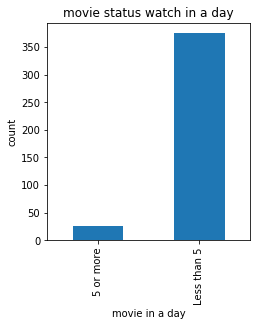

In [316]:
temp5 = df['movieinaday'].value_counts(ascending=True)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.xlabel('movie in a day')
plt.ylabel('count')
plt.title("movie status watch in a day")
temp5.plot(kind='bar')

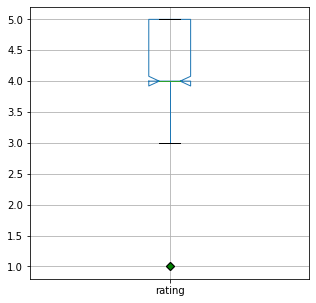

In [317]:
plt.figure(figsize = (5,5))
green_diamond = dict(markerfacecolor='g', marker='D')
df.boxplot(column='rating', notch=True, flierprops=green_diamond)

Text(0.5, 1.0, 'The rating of favourite movie')

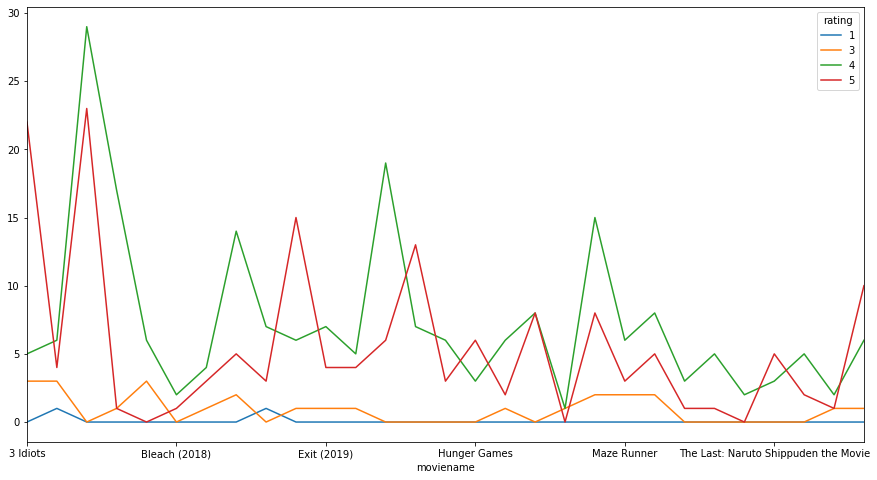

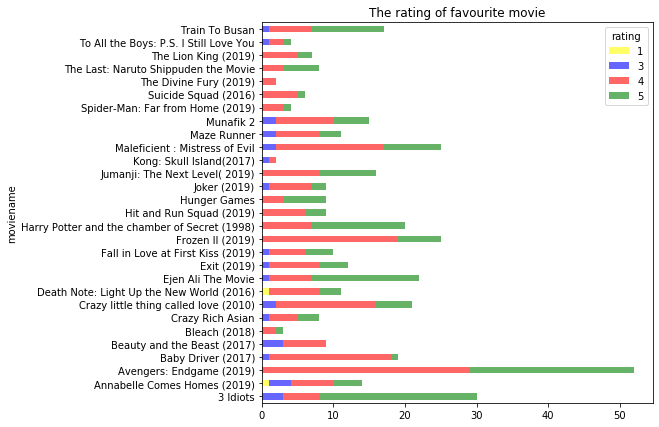

In [318]:
temp3 = pd.crosstab(df['moviename'],df['rating'])
temp3.plot(figsize=(15,8))
temp3.plot(kind='barh',stacked=True, color=['yellow','blue','red','green'], grid=False,alpha=0.6,figsize=(7,7))

plt.title('The rating of favourite movie')

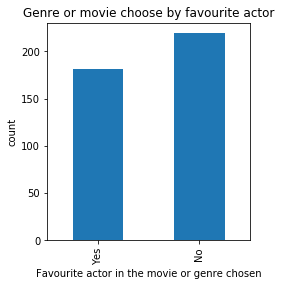

In [319]:
temp6 = df['favoriteactororactressisinthemovie'].value_counts(ascending=True)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.xlabel('Favourite actor in the movie or genre chosen')
plt.ylabel('count')
plt.title("Genre or movie choose by favourite actor")
temp6.plot(kind='bar')

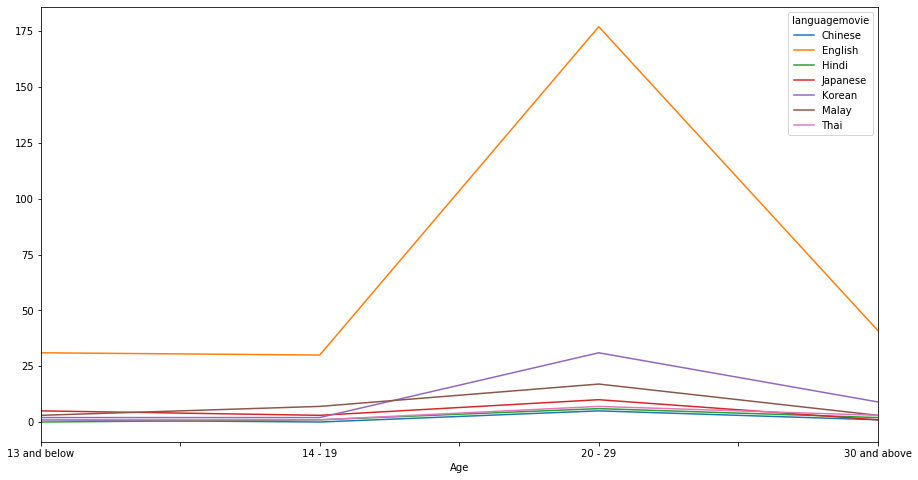

In [320]:
temp3 = pd.crosstab(df['Age'],df['languagemovie'])
temp3.plot(figsize=(15,8))

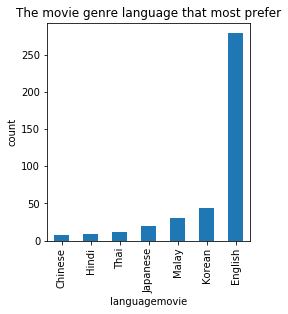

In [321]:
temp6 = df['languagemovie'].value_counts(ascending=True)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.xlabel('languagemovie')
plt.ylabel('count')
plt.title("The movie genre language that most prefer")
temp6.plot(kind='bar')

In [322]:
x1= df['moviename']
x2= df['rating']
x3= df['watchmovie']

dt = pd.DataFrame({'Movie Name':x1,
                   'rating':x2,
                   'watch movie':x3})
dt.head()

,Movie Name,rating,watch movie
0,Crazy little thing called love (2010),4,3 times
1,Annabelle Comes Homes (2019),4,3 times
2,Crazy little thing called love (2010),4,3 times
3,Crazy little thing called love (2010),4,3 times
4,Crazy little thing called love (2010),4,3 times


In [323]:
# frequency count of column genre 
count = df['genre'].value_counts() 
print(count) 

Thriller                                                                          28
Action;Adventure;Animation;Comedy;Crime;Horror;Mystery;Romance;Sci-fi;Thriller    19
Action;Adventure;Animation;Comedy;Crime;Fantasy;Horror;Mystery;Sci-fi;Thriller    13
Action;Adventure;Animation;Crime;Fantasy;Live Action;Romance;Sci-fi               11
Comedy                                                                             6
                                                                                  ..
Adventure;Animation;Comedy;Drama;Fantasy;Horror;Mystery;Romance;Thriller           1
Action;Adventure;Animation;Comedy;Drama                                            1
Crime;Mystery;Thriller                                                             1
Horror                                                                             1
Drama;Fantasy;Romance                                                              1
Name: genre, Length: 260, dtype: int64


In [324]:
#using count vectorizer
vectorizer=CountVectorizer(tokenizer= lambda x: x.split(';'))
genre_dtm=vectorizer.fit_transform(df['genre'])
print("number of data :", genre_dtm.shape[0])
print("number of unique genre :", genre_dtm.shape[1])

#some of the genres
genres=vectorizer.get_feature_names()
print("Some of the genres we have:", genres[:13])


number of data : 400
number of unique genre : 13
Some of the genres we have: ['action', 'adventure', 'animation', 'comedy', 'crime', 'drama', 'fantasy', 'horror', 'live action', 'mystery', 'romance', 'sci-fi', 'thriller']


In [325]:
# Multi-column frequency count 
count = df.groupby(['genre']).count() 
print(count) 

                                               Gender  Age  Status  State  \
genre                                                                       
Action                                              2    2       2      2   
Action;Adventure                                    1    1       1      1   
Action;Adventure;Animation                          1    1       1      1   
Action;Adventure;Animation;Comedy                   4    4       4      4   
Action;Adventure;Animation;Comedy;Crime;Drama       1    1       1      1   
...                                               ...  ...     ...    ...   
Horror;Mystery;Thriller                             1    1       1      1   
Horror;Thriller                                     2    2       2      2   
Mystery                                             1    1       1      1   
Mystery;Thriller                                    1    1       1      1   
Thriller                                           28   28      28     28   

In [326]:
new_df = df["genre"].str.split(';', expand=True)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Action,Adventure,Comedy,Crime,Mystery,Romance,Thriller,None,None,None,None,None,None
1,Thriller,None,None,None,None,None,None,None,None,None,None,None,None
2,Comedy,None,None,None,None,None,None,None,None,None,None,None,None
3,Comedy,None,None,None,None,None,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None,None,None,None


In [327]:
new_df.stack()
new_df.stack().value_counts()

Action         262
Adventure      255
Comedy         254
Animation      218
Thriller       212
Crime          191
Romance        181
Mystery        163
Horror         154
Fantasy        148
Sci-fi         136
Drama          130
Live Action     59
dtype: int64

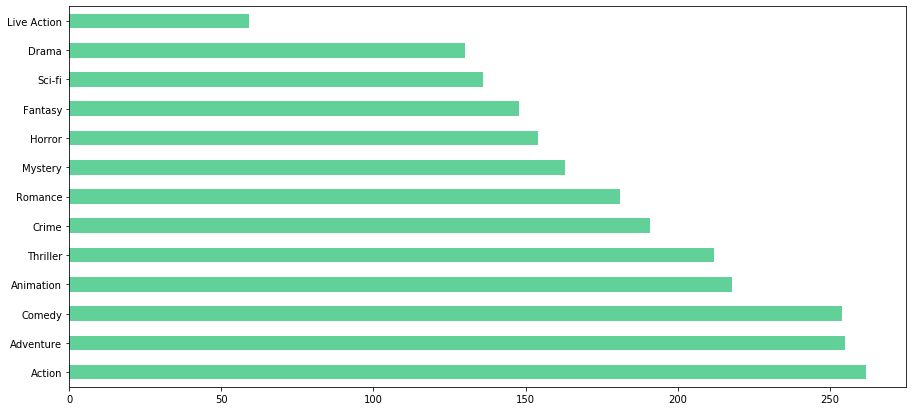

In [328]:
new_df.stack().value_counts().plot(kind='barh', figsize=(15,7), color="#61d199")

In [329]:
a = pd.concat([df, new_df], axis=1)


In [330]:
a.head()


,Gender,Age,Status,State,movieinaday,genre,moviename,rating,watchmovie,favoriteactororactressisinthemovie,...,3,4,5,6,7,8,9,10,11,12
0,Female,20 - 29,Student,Terengganu,Less than 5,Action;Adventure;Comedy;Crime;Mystery;Romance;...,Crazy little thing called love (2010),4,3 times,Yes,...,Crime,Mystery,Romance,Thriller,None,None,None,None,None,None
1,Male,20 - 29,Student,Kedah,Less than 5,Thriller,Annabelle Comes Homes (2019),4,3 times,No,...,None,None,None,None,None,None,None,None,None,None
2,Female,20 - 29,Student,Terengganu,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,...,None,None,None,None,None,None,None,None,None,None
3,Female,20 - 29,Student,Terengganu,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,...,None,None,None,None,None,None,None,None,None,None
4,Female,20 - 29,Student,Kedah,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,...,None,None,None,None,None,None,None,None,None,None


In [331]:
a.rename(columns = {0: 'first_choice', 1: 'Second_choice'}, inplace=True)

In [332]:
a.dtypes

Gender                                object
Age                                   object
Status                                object
State                                 object
movieinaday                           object
genre                                 object
moviename                             object
rating                                 int64
watchmovie                            object
favoriteactororactressisinthemovie    object
movieplatform                         object
languagemovie                         object
first_choice                          object
Second_choice                         object
2                                     object
3                                     object
4                                     object
5                                     object
6                                     object
7                                     object
8                                     object
9                                     object
10        

In [333]:
df.head()

,Gender,Age,Status,State,movieinaday,genre,moviename,rating,watchmovie,favoriteactororactressisinthemovie,movieplatform,languagemovie
0,Female,20 - 29,Student,Terengganu,Less than 5,Action;Adventure;Comedy;Crime;Mystery;Romance;...,Crazy little thing called love (2010),4,3 times,Yes,Netflix,English
1,Male,20 - 29,Student,Kedah,Less than 5,Thriller,Annabelle Comes Homes (2019),4,3 times,No,Netflix,English
2,Female,20 - 29,Student,Terengganu,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,Netflix,English
3,Female,20 - 29,Student,Terengganu,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,Netflix,English
4,Female,20 - 29,Student,Kedah,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,Online sites,English


Text(0.5, 1.0, 'People who choose genre as first choice by gender')

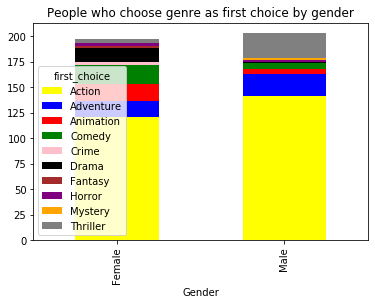

In [334]:
temp7 = pd.crosstab(a['Gender'],a['first_choice'])

temp7.plot(kind='bar',stacked=True, color=['yellow','blue','red','green','pink','black','brown','purple','orange','gray','darkblue','indigo'], grid=False)

plt.title('People who choose genre as first choice by gender')

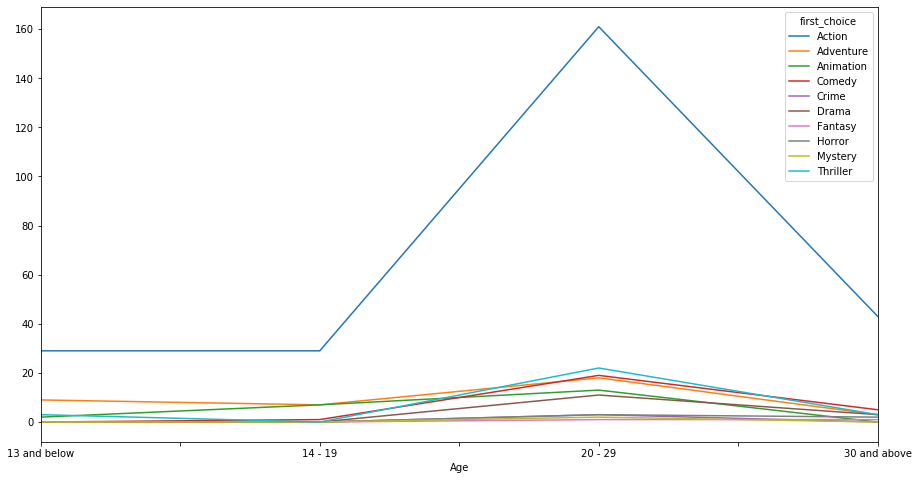

In [335]:
temp8 = pd.crosstab(a['Age'],a['first_choice'])
temp8.plot(figsize=(15,8))

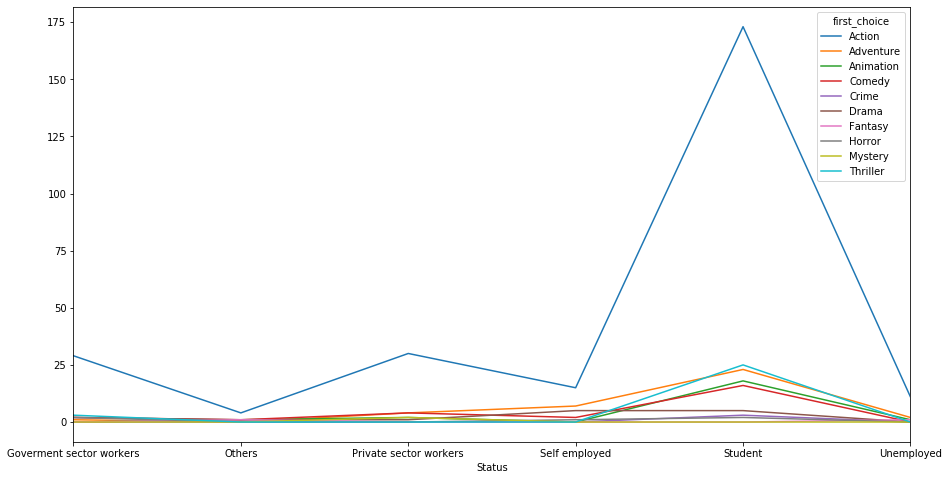

In [336]:
temp9 = pd.crosstab(a['Status'],a['first_choice'])
temp9.plot(figsize=(15,8))

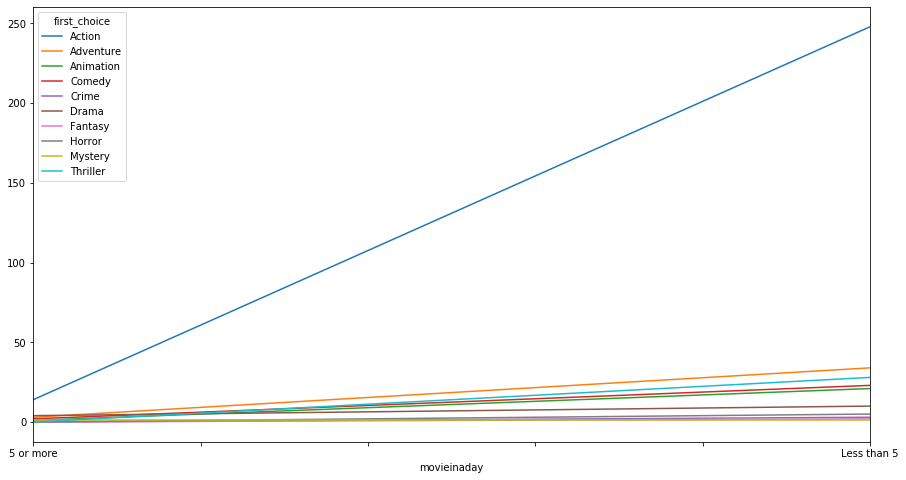

In [337]:
temp10 = pd.crosstab(a['movieinaday'],a['first_choice'])
temp10.plot(figsize=(15,8))

Text(0.5, 1.0, 'People who choose genre as first choice by state')

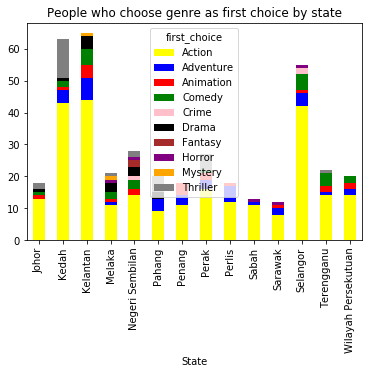

In [338]:
temp11 = pd.crosstab(a['State'],a['first_choice'])

temp11.plot(kind='bar',stacked=True, color=['yellow','blue','red','green','pink','black','brown','purple','orange','gray','darkblue','indigo'], grid=False)

plt.title('People who choose genre as first choice by state')

Text(0.5, 1.0, 'People who choose genre as first choice by movie platform')

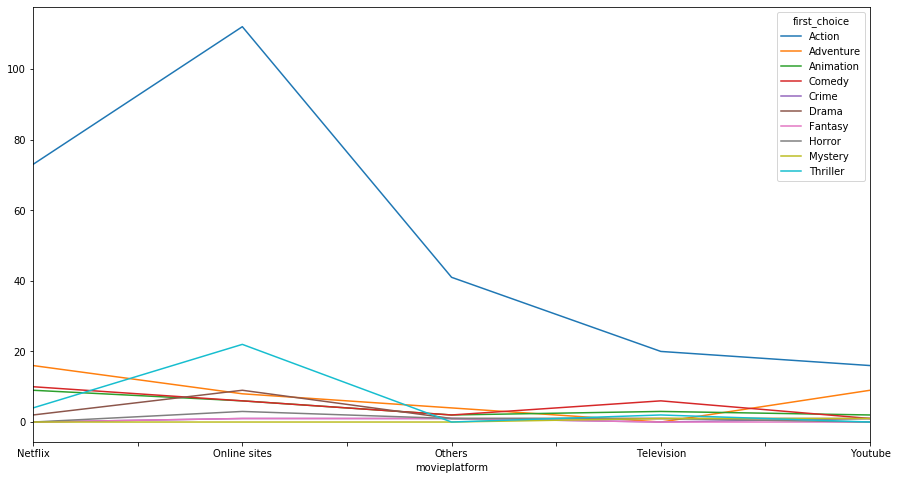

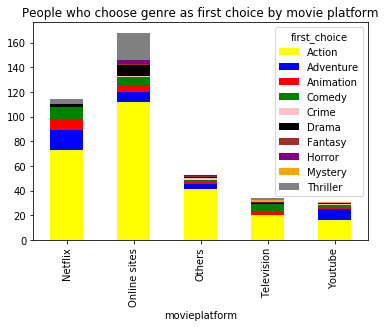

In [339]:
temp10 = pd.crosstab(a['movieplatform'],a['first_choice'])
temp10.plot(figsize=(15,8))

temp10 = pd.crosstab(a['movieplatform'],a['first_choice'])

temp10.plot(kind='bar',stacked=True, color=['yellow','blue','red','green','pink','black','brown','purple','orange','gray','darkblue','indigo'], grid=False)

plt.title('People who choose genre as first choice by movie platform')

Text(0.5, 1.0, 'People who choose genre as first choice by movie language')

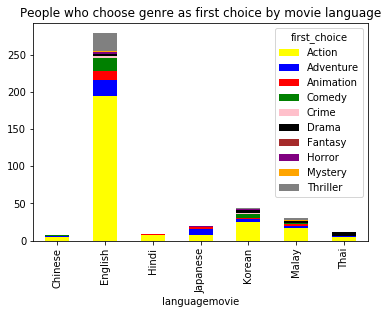

In [340]:
temp11 = pd.crosstab(a['languagemovie'],a['first_choice'])

temp11.plot(kind='bar',stacked=True, color=['yellow','blue','red','green','pink','black','brown','purple','orange','gray','darkblue','indigo'], grid=False)

plt.title('People who choose genre as first choice by movie language')

Text(0.5, 1.0, 'People who choose movie genre as first choice by favourite actor')

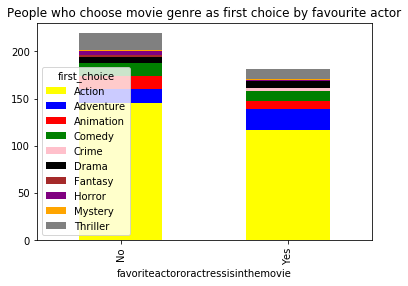

In [341]:
temp11 = pd.crosstab(a['favoriteactororactressisinthemovie'],a['first_choice'])

temp11.plot(kind='bar',stacked=True, color=['yellow','blue','red','green','pink','black','brown','purple','orange','gray','darkblue','indigo'], grid=False)

plt.title('People who choose movie genre as first choice by favourite actor')

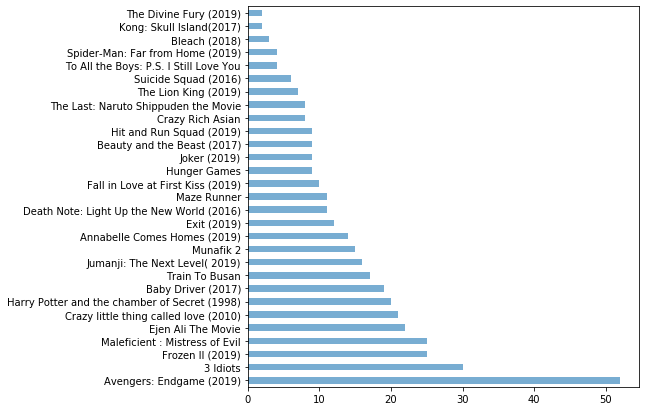

In [342]:
df['moviename'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

Text(0.5, 1.0, 'The first choice genre by favourite movie')

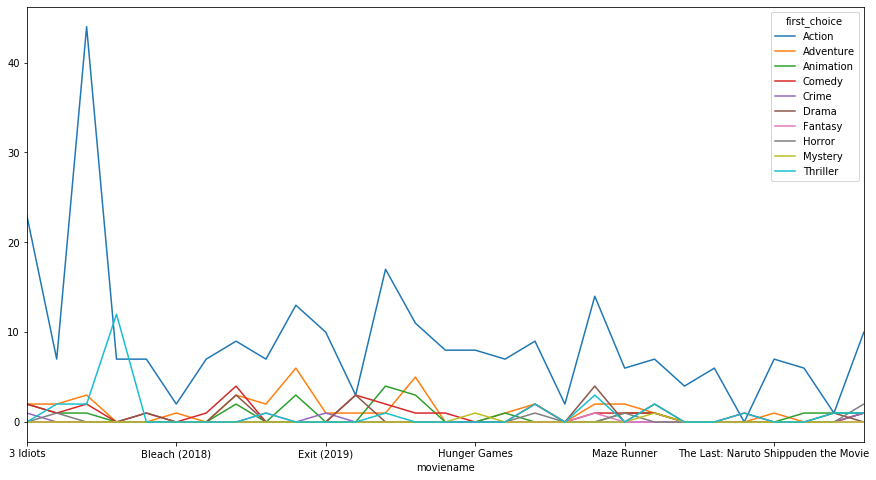

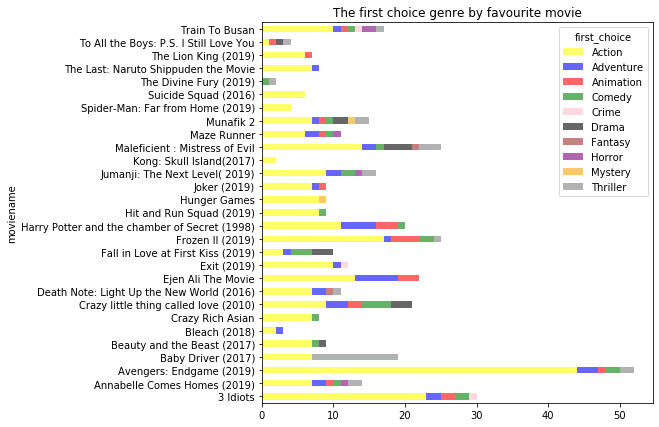

In [343]:
temp3 = pd.crosstab(a['moviename'],a['first_choice'])
temp3.plot(figsize=(15,8))
temp3.plot(kind='barh',stacked=True, color=['yellow','blue','red','green','pink','black','brown','purple','orange','gray','darkblue','indigo'], grid=False,alpha=0.6,figsize=(7,7))

plt.title('The first choice genre by favourite movie')

Text(0.5, 1.0, 'The first choice genre by rating')

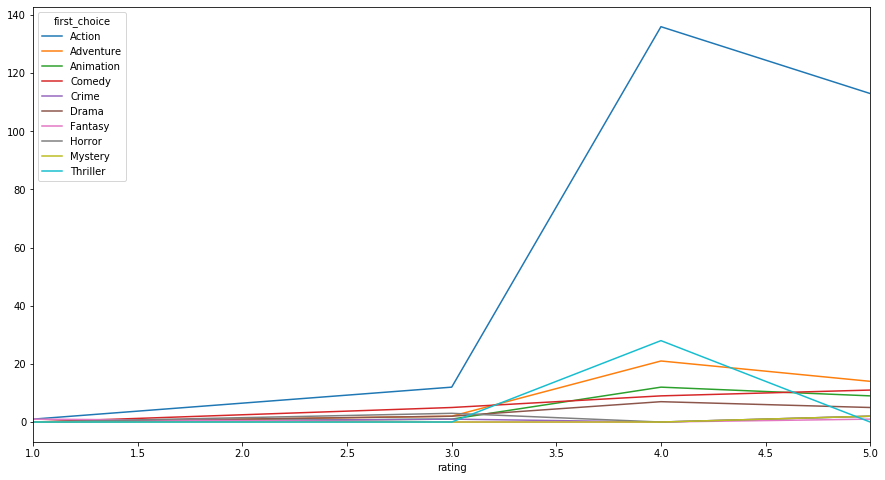

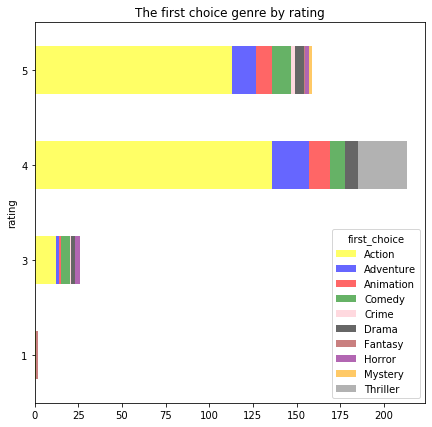

In [344]:
temp3 = pd.crosstab(a['rating'],a['first_choice'])
temp3.plot(figsize=(15,8))
temp3.plot(kind='barh',stacked=True, color=['yellow','blue','red','green','pink','black','brown','purple','orange','gray','darkblue','indigo'], grid=False,alpha=0.6,figsize=(7,7))

plt.title('The first choice genre by rating')

In [345]:
df.head()

,Gender,Age,Status,State,movieinaday,genre,moviename,rating,watchmovie,favoriteactororactressisinthemovie,movieplatform,languagemovie
0,Female,20 - 29,Student,Terengganu,Less than 5,Action;Adventure;Comedy;Crime;Mystery;Romance;...,Crazy little thing called love (2010),4,3 times,Yes,Netflix,English
1,Male,20 - 29,Student,Kedah,Less than 5,Thriller,Annabelle Comes Homes (2019),4,3 times,No,Netflix,English
2,Female,20 - 29,Student,Terengganu,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,Netflix,English
3,Female,20 - 29,Student,Terengganu,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,Netflix,English
4,Female,20 - 29,Student,Kedah,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,Online sites,English


In [346]:
df.dtypes

Gender                                object
Age                                   object
Status                                object
State                                 object
movieinaday                           object
genre                                 object
moviename                             object
rating                                 int64
watchmovie                            object
favoriteactororactressisinthemovie    object
movieplatform                         object
languagemovie                         object
dtype: object

In [347]:
#DATA CLEANING

In [348]:
#To report missing data
df.apply(lambda x: sum(x.isnull()),axis=0) 

Gender                                0
Age                                   0
Status                                0
State                                 0
movieinaday                           0
genre                                 0
moviename                             0
rating                                0
watchmovie                            0
favoriteactororactressisinthemovie    0
movieplatform                         0
languagemovie                         0
dtype: int64

In [349]:
# To report missing data
a.apply(lambda x: sum(x.isnull()),axis=0) 

Gender                                  0
Age                                     0
Status                                  0
State                                   0
movieinaday                             0
genre                                   0
moviename                               0
rating                                  0
watchmovie                              0
favoriteactororactressisinthemovie      0
movieplatform                           0
languagemovie                           0
first_choice                            0
Second_choice                          46
2                                      81
3                                     109
4                                     142
5                                     191
6                                     232
7                                     262
8                                     299
9                                     321
10                                    370
11                                

In [350]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Status'].fillna(df['Status'].mode()[0], inplace=True)
df['State'].fillna(df['State'].mode()[0], inplace=True)
df['movieinaday'].fillna('No',inplace=True)
df['genre'].fillna(df['genre'].mode()[0], inplace=True)
df['moviename'].fillna(df['moviename'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['watchmovie'].fillna(df['watchmovie'].mode()[0], inplace=True)
df['favoriteactororactressisinthemovie'].fillna(df['favoriteactororactressisinthemovie'].mode()[0], inplace=True)
df['movieplatform'].fillna(df['movieplatform'].mode()[0], inplace=True)
df['languagemovie'].fillna(df['languagemovie'].mode()[0], inplace=True)

In [351]:
# Recheck missing data
df.apply(lambda x: sum(x.isnull()),axis=0)

Gender                                0
Age                                   0
Status                                0
State                                 0
movieinaday                           0
genre                                 0
moviename                             0
rating                                0
watchmovie                            0
favoriteactororactressisinthemovie    0
movieplatform                         0
languagemovie                         0
dtype: int64

In [352]:
# To report missing data for a dataframe
a.apply(lambda x: sum(x.isnull()),axis=0) 

Gender                                  0
Age                                     0
Status                                  0
State                                   0
movieinaday                             0
genre                                   0
moviename                               0
rating                                  0
watchmovie                              0
favoriteactororactressisinthemovie      0
movieplatform                           0
languagemovie                           0
first_choice                            0
Second_choice                          46
2                                      81
3                                     109
4                                     142
5                                     191
6                                     232
7                                     262
8                                     299
9                                     321
10                                    370
11                                

In [353]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
a['Gender'].fillna(a['Gender'].mode()[0], inplace=True)
a['Status'].fillna(a['Status'].mode()[0], inplace=True)
a['State'].fillna(a['State'].mode()[0], inplace=True)
a['movieinaday'].fillna(a['movieinaday'].mode()[0], inplace=True)
a['genre'].fillna(a['genre'].mode()[0], inplace=True)
a['moviename'].fillna(a['moviename'].mode()[0], inplace=True)
a['rating'].fillna(a['rating'].mode()[0], inplace=True)
a['watchmovie'].fillna(a['watchmovie'].mode()[0], inplace=True)
a['favoriteactororactressisinthemovie'].fillna(a['favoriteactororactressisinthemovie'].mode()[0], inplace=True)
a['movieplatform'].fillna(a['movieplatform'].mode()[0], inplace=True)
a['languagemovie'].fillna(a['languagemovie'].mode()[0], inplace=True)
a['first_choice'].fillna('No',inplace=True)
a['Second_choice'].fillna('No',inplace=True)
a[2].fillna('No',inplace=True)
a[3].fillna('No',inplace=True)
a[4].fillna('No',inplace=True)
a[5].fillna('No',inplace=True)
a[6].fillna('No',inplace=True)
a[7].fillna('No',inplace=True)
a[8].fillna('No',inplace=True)
a[9].fillna('No',inplace=True)
a[10].fillna('No',inplace=True)
a[11].fillna('No',inplace=True)
a[12].fillna('No',inplace=True)

In [354]:
# Recheck missing data for a dataframe
a.apply(lambda x: sum(x.isnull()),axis=0)

Gender                                0
Age                                   0
Status                                0
State                                 0
movieinaday                           0
genre                                 0
moviename                             0
rating                                0
watchmovie                            0
favoriteactororactressisinthemovie    0
movieplatform                         0
languagemovie                         0
first_choice                          0
Second_choice                         0
2                                     0
3                                     0
4                                     0
5                                     0
6                                     0
7                                     0
8                                     0
9                                     0
10                                    0
11                                    0
12                                    0


In [355]:
a.head()

,Gender,Age,Status,State,movieinaday,genre,moviename,rating,watchmovie,favoriteactororactressisinthemovie,...,3,4,5,6,7,8,9,10,11,12
0,Female,20 - 29,Student,Terengganu,Less than 5,Action;Adventure;Comedy;Crime;Mystery;Romance;...,Crazy little thing called love (2010),4,3 times,Yes,...,Crime,Mystery,Romance,Thriller,No,No,No,No,No,No
1,Male,20 - 29,Student,Kedah,Less than 5,Thriller,Annabelle Comes Homes (2019),4,3 times,No,...,No,No,No,No,No,No,No,No,No,No
2,Female,20 - 29,Student,Terengganu,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,...,No,No,No,No,No,No,No,No,No,No
3,Female,20 - 29,Student,Terengganu,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,...,No,No,No,No,No,No,No,No,No,No
4,Female,20 - 29,Student,Kedah,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,...,No,No,No,No,No,No,No,No,No,No


In [356]:
df.head()

,Gender,Age,Status,State,movieinaday,genre,moviename,rating,watchmovie,favoriteactororactressisinthemovie,movieplatform,languagemovie
0,Female,20 - 29,Student,Terengganu,Less than 5,Action;Adventure;Comedy;Crime;Mystery;Romance;...,Crazy little thing called love (2010),4,3 times,Yes,Netflix,English
1,Male,20 - 29,Student,Kedah,Less than 5,Thriller,Annabelle Comes Homes (2019),4,3 times,No,Netflix,English
2,Female,20 - 29,Student,Terengganu,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,Netflix,English
3,Female,20 - 29,Student,Terengganu,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,Netflix,English
4,Female,20 - 29,Student,Kedah,Less than 5,Comedy,Crazy little thing called love (2010),4,3 times,No,Online sites,English


In [357]:
#DATA TRANSFORMATION

In [360]:
# split each movie's genre list, then form a set from the unwrapped list of all genres
categories = set([s for genre_list in df.genre.unique() for s in genre_list.split(";")])

# one-hot encode each movie's classification
for cat in categories:
    df[cat] = df.genre.transform(lambda s: int(cat in s))
# drop other columns
df1 = df[['genre'] + list(categories)]
df1.head()

,genre,Fantasy,Crime,Adventure,Romance,Sci-fi,Live Action,Action,Animation,Horror,Thriller,Drama,Comedy,Mystery
0,Action;Adventure;Comedy;Crime;Mystery;Romance;...,0,1,1,1,0,0,1,0,0,1,0,1,1
1,Thriller,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Comedy,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Comedy,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Comedy,0,0,0,0,0,0,0,0,0,0,0,1,0


In [361]:
df1.drop('genre', axis=1, inplace=True)

In [362]:

#Convert to Numerical

var_mod = ['Age','Gender','Status','State','movieinaday','genre','moviename','rating','watchmovie','favoriteactororactressisinthemovie','movieplatform','languagemovie']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [363]:

#Convert to Numerical

var_mod = ['Age','Gender','Status','State','movieinaday','genre','moviename','rating','watchmovie','favoriteactororactressisinthemovie','movieplatform','languagemovie','first_choice']
le = LabelEncoder()
for i in var_mod:
    a[i] = le.fit_transform(a[i])

In [364]:
df.tail()

,Gender,Age,Status,State,movieinaday,genre,moviename,rating,watchmovie,favoriteactororactressisinthemovie,...,Romance,Sci-fi,Live Action,Action,Animation,Horror,Thriller,Drama,Comedy,Mystery
395,0,1,4,13,1,29,9,2,1,1,...,0,1,0,1,1,1,1,0,1,1
396,0,2,4,1,1,29,10,2,3,0,...,0,1,0,1,1,1,1,0,1,1
397,0,1,4,1,1,29,6,2,1,1,...,0,1,0,1,1,1,1,0,1,1
398,0,2,4,13,1,29,3,2,1,0,...,0,1,0,1,1,1,1,0,1,1
399,1,2,4,1,1,29,26,2,1,1,...,0,1,0,1,1,1,1,0,1,1


In [365]:
df = df[['Age','genre', 'Gender','Status','State','movieinaday','moviename','rating','watchmovie','favoriteactororactressisinthemovie','movieplatform','languagemovie','Horror','Adventure','Fantasy','Crime','Animation','Mystery','Comedy','Romance','Action','Live Action','Thriller','Sci-fi','Drama']]
#df = df[['Age','genre', 'Gender','Status','State','movieinaday','moviename','rating','watchmovie','favoriteactororactressisinthemovie?','movieplatform','languagemovie',]]

In [366]:
df.tail()

,Age,genre,Gender,Status,State,movieinaday,moviename,rating,watchmovie,favoriteactororactressisinthemovie,...,Crime,Animation,Mystery,Comedy,Romance,Action,Live Action,Thriller,Sci-fi,Drama
395,1,29,0,4,13,1,9,2,1,1,...,1,1,1,1,0,1,0,1,1,0
396,2,29,0,4,1,1,10,2,3,0,...,1,1,1,1,0,1,0,1,1,0
397,1,29,0,4,1,1,6,2,1,1,...,1,1,1,1,0,1,0,1,1,0
398,2,29,0,4,13,1,3,2,1,0,...,1,1,1,1,0,1,0,1,1,0
399,2,29,1,4,1,1,26,2,1,1,...,1,1,1,1,0,1,0,1,1,0


In [367]:
a.tail()

,Gender,Age,Status,State,movieinaday,genre,moviename,rating,watchmovie,favoriteactororactressisinthemovie,...,3,4,5,6,7,8,9,10,11,12
395,0,1,4,13,1,29,9,2,1,1,...,Comedy,Crime,Fantasy,Horror,Mystery,Sci-fi,Thriller,No,No,No
396,0,2,4,1,1,29,10,2,3,0,...,Comedy,Crime,Fantasy,Horror,Mystery,Sci-fi,Thriller,No,No,No
397,0,1,4,1,1,29,6,2,1,1,...,Comedy,Crime,Fantasy,Horror,Mystery,Sci-fi,Thriller,No,No,No
398,0,2,4,13,1,29,3,2,1,0,...,Comedy,Crime,Fantasy,Horror,Mystery,Sci-fi,Thriller,No,No,No
399,1,2,4,1,1,29,26,2,1,1,...,Comedy,Crime,Fantasy,Horror,Mystery,Sci-fi,Thriller,No,No,No


In [368]:
#df.iloc[:, 1:12]
#df.loc[:, ['Horror','Adventure','Fantasy','Crime','Animation','Mystery','Comedy','Romance','Action','LiveAction','Thriller','Scifi','Drama']]

#x = df.iloc[:, 1:12]
#y = df.loc[:, ['Horror','Adventure','Fantasy','Crime','Animation','Mystery','Comedy','Romance','Action','Live Action','Thriller','Sci-fi','Drama']]

df.iloc[:, 0:25]
df.loc[:, ['Action']]

x = df.iloc[:, 0:25]
y = df.loc[:, ['Action']]

In [369]:
a.iloc[:, 0:30]
a.loc[:, ['first_choice']]

x1 = a.iloc[:, 0:30]
y1 = a.loc[:, ['first_choice']]

In [370]:
x.head()

,Age,genre,Gender,Status,State,movieinaday,moviename,rating,watchmovie,favoriteactororactressisinthemovie,...,Crime,Animation,Mystery,Comedy,Romance,Action,Live Action,Thriller,Sci-fi,Drama
0,2,105,0,4,12,1,7,2,1,1,...,1,0,1,1,1,1,0,1,0,0
1,2,259,1,4,1,1,1,2,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2,227,0,4,12,1,7,2,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2,227,0,4,12,1,7,2,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,227,0,4,1,1,7,2,1,0,...,0,0,0,1,0,0,0,0,0,0


In [371]:
x1.tail()

,Gender,Age,Status,State,movieinaday,genre,moviename,rating,watchmovie,favoriteactororactressisinthemovie,...,3,4,5,6,7,8,9,10,11,12
395,0,1,4,13,1,29,9,2,1,1,...,Comedy,Crime,Fantasy,Horror,Mystery,Sci-fi,Thriller,No,No,No
396,0,2,4,1,1,29,10,2,3,0,...,Comedy,Crime,Fantasy,Horror,Mystery,Sci-fi,Thriller,No,No,No
397,0,1,4,1,1,29,6,2,1,1,...,Comedy,Crime,Fantasy,Horror,Mystery,Sci-fi,Thriller,No,No,No
398,0,2,4,13,1,29,3,2,1,0,...,Comedy,Crime,Fantasy,Horror,Mystery,Sci-fi,Thriller,No,No,No
399,1,2,4,1,1,29,26,2,1,1,...,Comedy,Crime,Fantasy,Horror,Mystery,Sci-fi,Thriller,No,No,No


In [372]:
y.head()

,Action
0,1
1,0
2,0
3,0
4,0


In [373]:
y1.head()

,first_choice
0,0
1,9
2,3
3,3
4,3


Text(0.5, 1.0, 'The Action genre by movie platform')

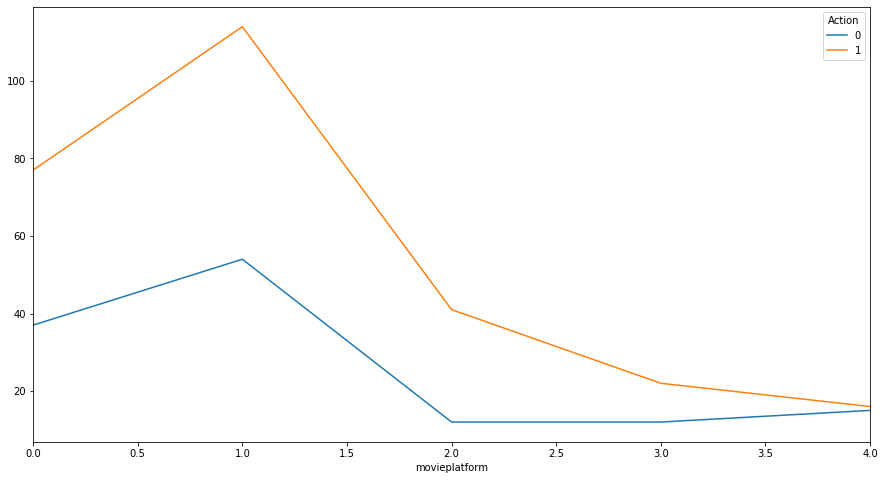

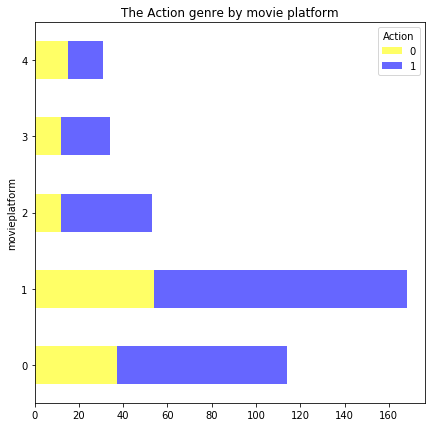

In [374]:
temp3 = pd.crosstab(df['movieplatform'],df['Action'])
temp3.plot(figsize=(15,8))
temp3.plot(kind='barh',stacked=True, color=['yellow','blue','red','green','pink','black','brown','purple','orange','gray','darkblue','indigo'], grid=False,alpha=0.6,figsize=(7,7))

plt.title('The Action genre by movie platform')

Text(0.5, 1.0, 'The Action genre by movielanguage that most prefer')

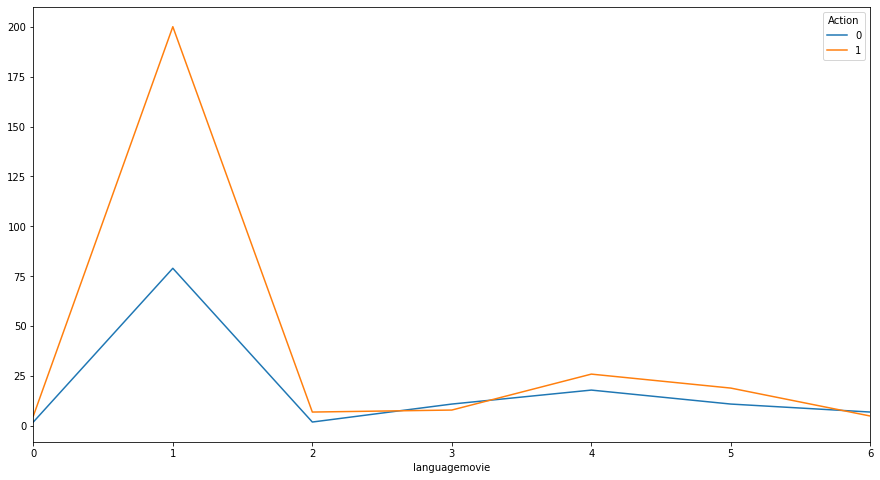

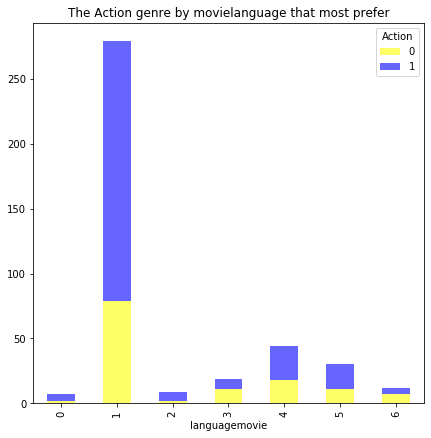

In [375]:
temp3 = pd.crosstab(df['languagemovie'],df['Action'])
temp3.plot(figsize=(15,8))
temp3.plot(kind='bar',stacked=True, color=['yellow','blue','red','green','pink','black','brown','purple','orange','gray','darkblue','indigo'], grid=False,alpha=0.6,figsize=(7,7))

plt.title('The Action genre by movielanguage that most prefer')

Text(0.5, 1.0, 'The Action genre by favourite actor')

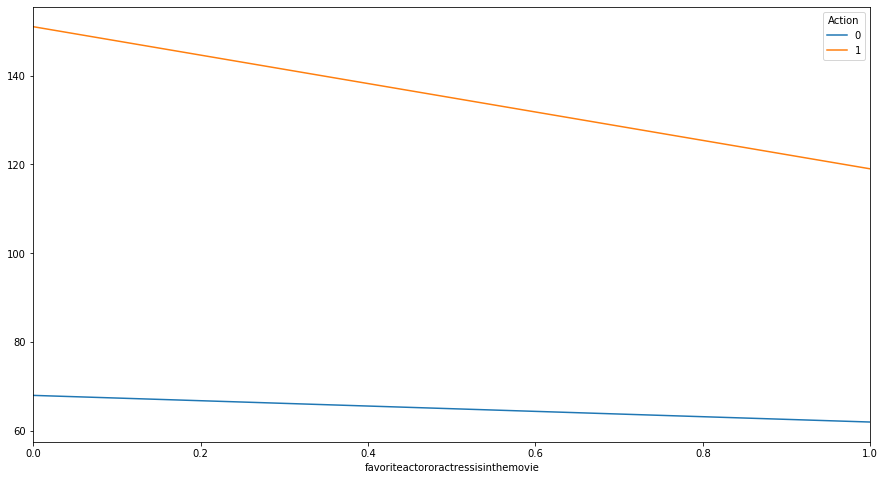

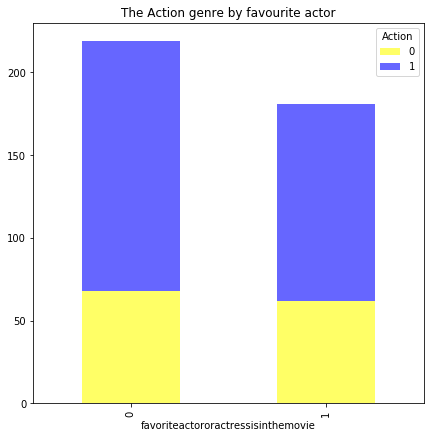

In [376]:
temp3 = pd.crosstab(df['favoriteactororactressisinthemovie'],df['Action'])
temp3.plot(figsize=(15,8))
temp3.plot(kind='bar',stacked=True, color=['yellow','blue','red','green','pink','black','brown','purple','orange','gray','darkblue','indigo'], grid=False,alpha=0.6,figsize=(7,7))

plt.title('The Action genre by favourite actor') 

Text(0.5, 1.0, 'The Adventure genre by movie watch in a day')

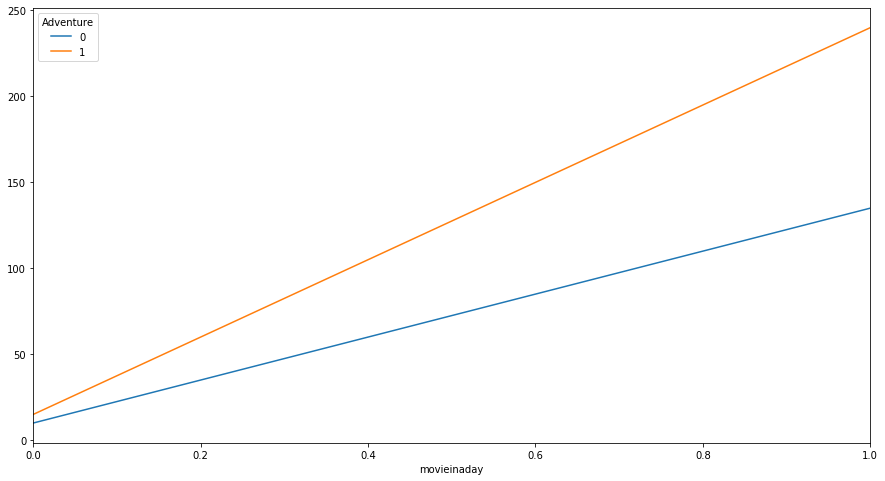

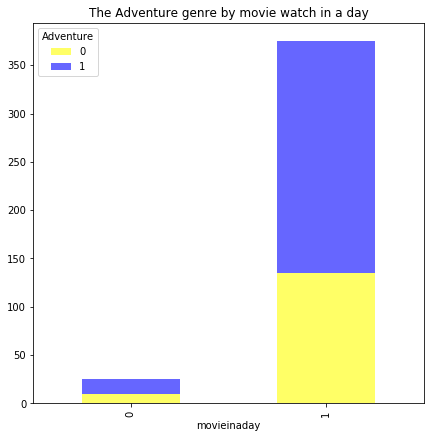

In [377]:
temp3 = pd.crosstab(df['movieinaday'],df['Adventure'])
temp3.plot(figsize=(15,8))
temp3.plot(kind='bar',stacked=True, color=['yellow','blue','red','green','pink','black','brown','purple','orange','gray','darkblue','indigo'], grid=False,alpha=0.6,figsize=(7,7))

plt.title('The Adventure genre by movie watch in a day') 

Text(0.5, 1.0, 'The Comedy genre by movie watch in a day')

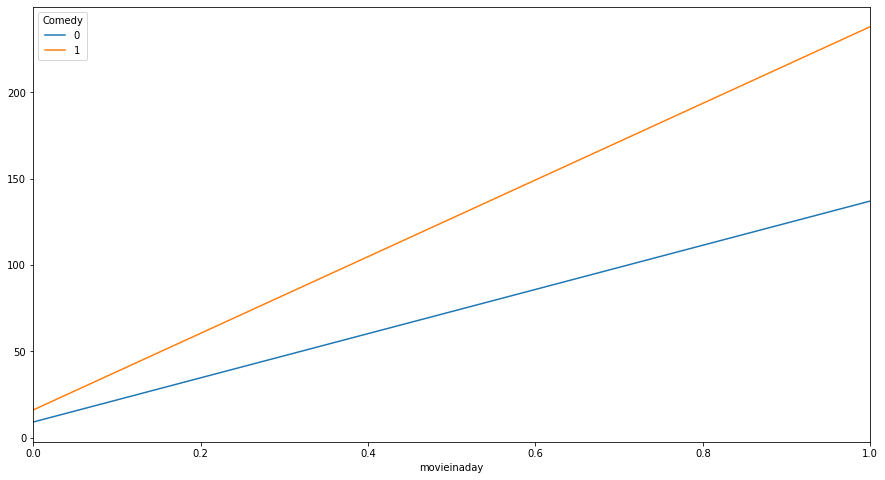

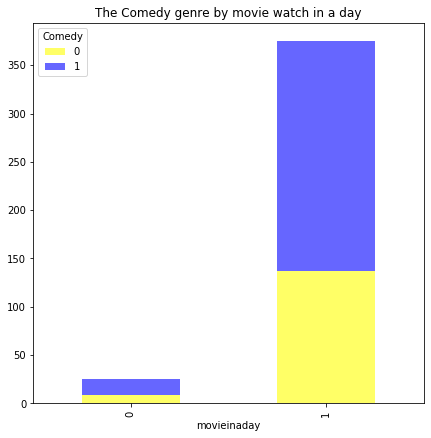

In [378]:
temp3 = pd.crosstab(df['movieinaday'],df['Comedy'])
temp3.plot(figsize=(15,8))
temp3.plot(kind='bar',stacked=True, color=['yellow','blue','red','green','pink','black','brown','purple','orange','gray','darkblue','indigo'], grid=False,alpha=0.6,figsize=(7,7))

plt.title('The Comedy genre by movie watch in a day') 

Text(0.5, 1.0, 'The Live action genre by status')

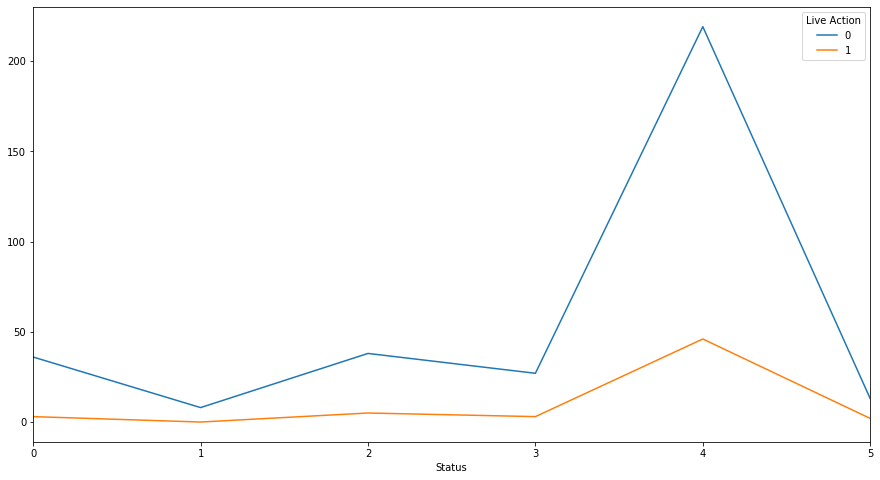

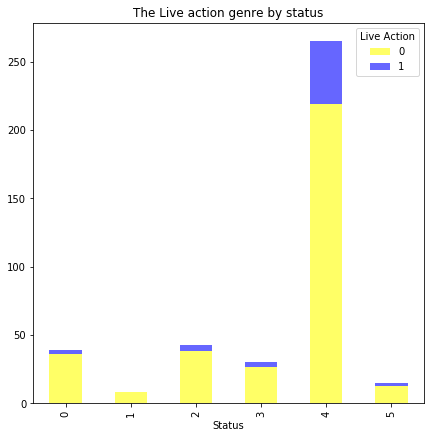

In [379]:
temp3 = pd.crosstab(df['Status'],df['Live Action'])
temp3.plot(figsize=(15,8))
temp3.plot(kind='bar',stacked=True, color=['yellow','blue','red','green','pink','black','brown','purple','orange','gray','darkblue','indigo'], grid=False,alpha=0.6,figsize=(7,7))

plt.title('The Live action genre by status') 

Text(0.5, 1.0, 'Gender x status x action genre')

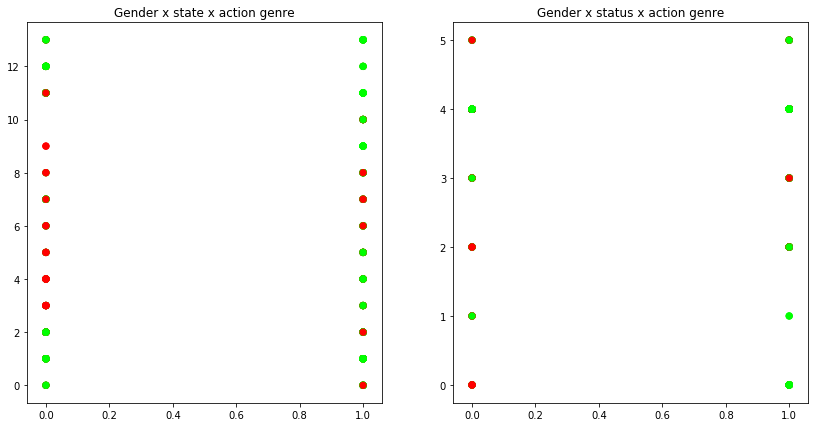

In [380]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime'])

# Plot Gender x state x action genre
plt.subplot(1, 2, 1)
plt.scatter(x.Gender, x.State , c=colormap[y.Action], s=40)
plt.title('Gender x state x action genre')

# Plot Gender x status x action genre
plt.subplot(1, 2, 2)
plt.scatter(x.Gender, x.Status ,  c=colormap[y.Action], s=40)
plt.title('Gender x status x action genre')


Text(0.5, 1.0, 'age x state x action genre')

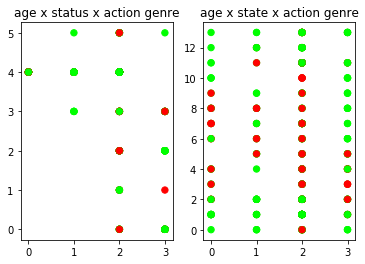

In [381]:
# Plot Age x state x action genre
plt.subplot(1, 2, 1)
plt.scatter(x.Age, x.Status ,  c=colormap[y.Action], s=40)
plt.title('age x status x action genre')

# Plot Action
plt.subplot(1, 2, 2)
plt.scatter(x.Age, x.State,  c=colormap[y.Action], s=40)
plt.title('age x state x action genre')

Text(0.5, 1.0, 'movie')

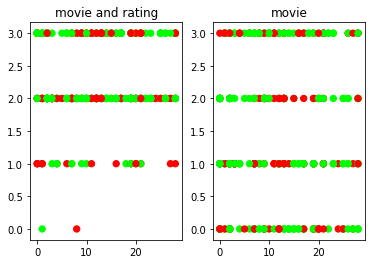

In [382]:
# Plot movie and rating
plt.subplot(1, 2, 1)
plt.scatter(x.moviename, x.rating ,  c=colormap[y.Action], s=40)
plt.title('movie and rating')

# Plot movie
plt.subplot(1, 2, 2)
plt.scatter(x.moviename, x.watchmovie ,  c=colormap[y.Action], s=40)
plt.title('movie')

Text(0.5, 1.0, 'moviename x movieinaday')

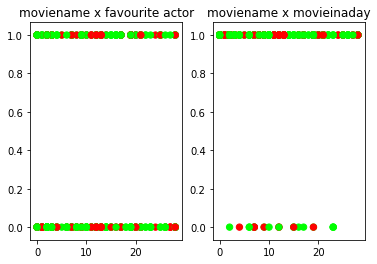

In [383]:
# Plot moviename x favourite actor
plt.subplot(1, 2, 1)
plt.scatter(x.moviename, x.favoriteactororactressisinthemovie,  c=colormap[y.Action], s=40)
plt.title('moviename x favourite actor')

# Plot moviename x movieinaday
plt.subplot(1, 2, 2)
plt.scatter(x.moviename, x.movieinaday , c=colormap[y.Action], s=40)
plt.title('moviename x movieinaday')


Text(0.5, 1.0, 'Status x movieinaday')

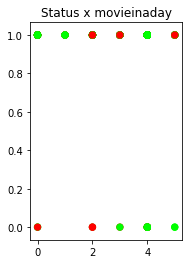

In [384]:
# Plot movie
plt.subplot(1, 2, 1)
plt.scatter(x.Status, x.movieinaday , c=colormap[y.Action], s=40)
plt.title('Status x movieinaday')

Text(0.5, 1.0, 'age x movie platform x Action')

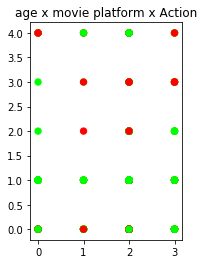

In [385]:
# Plot  age x movie platform x Action
plt.subplot(1, 2, 1)
plt.scatter(x.Age, x.movieplatform ,  c=colormap[y.Action], s=40)
plt.title('age x movie platform x Action')

Text(0.5, 1.0, 'gender x language movie')

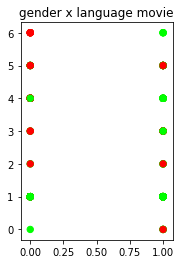

In [386]:
# Plot gender x language movie
plt.subplot(1, 2, 1)
plt.scatter(x.Gender, x.languagemovie ,  c=colormap[y.Action], s=40)
plt.title('gender x language movie')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


Text(0.5, 1.0, 'Genre: K-NN Classification')

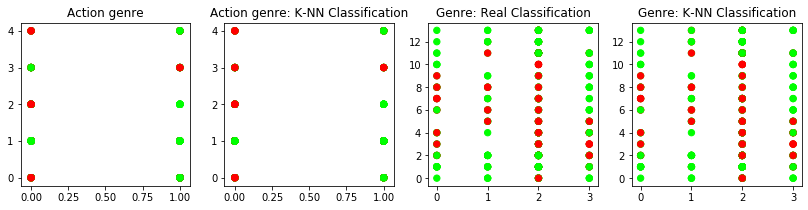

In [387]:
###################################################################

# Modelling

# K-Nearest Neighbor
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=2, p=2, weights='uniform')
model.fit(x, y)
yPred = model.predict(x)
# small k lead to more complex model and OF

# View the results
# Set the size of the plot
plt.figure(figsize=(14,3))

# Create a colormap
colormap = np.array(['red', 'lime'])

# Plot the Original Classifications
plt.subplot(1, 4, 1)
plt.scatter(x.Gender, x.movieplatform, c=colormap[y.Action], s=40)
plt.title('Action genre')

#Plot the Models Classifications
plt.subplot(1, 4, 2)
plt.scatter(x.Gender, x.movieplatform, c=colormap[yPred], s=40)
plt.title('Action genre: K-NN Classification')

# Plot the Original Classifications
plt.subplot(1, 4, 3)
plt.scatter(x.Age, x.State, c=colormap[y.Action], s=40)
plt.title('Genre: Real Classification')

# Plot the Models Classifications
plt.subplot(1, 4, 4)
plt.scatter(x.Age, x.State, c=colormap[yPred], s=40)
plt.title('Genre: K-NN Classification')


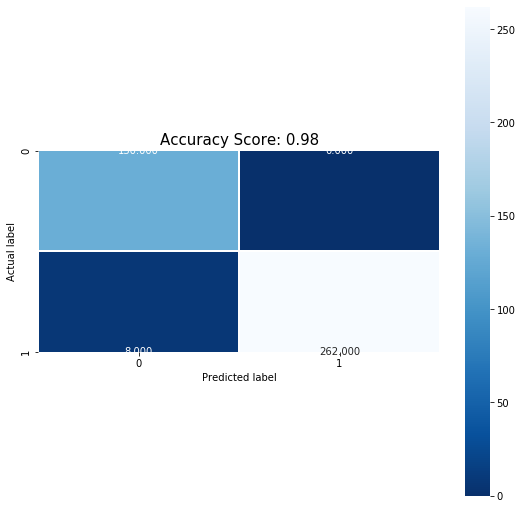

In [388]:
###################################################################
# Testing & performance analysis -Training data

# Seaborn #Run at new python 3
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(sm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(sm.accuracy_score(y.Action, yPred))
plt.title(all_sample_title, size = 15);


###################################################################

In [389]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import itertools
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_similarity_score # Jaccard Similarity

In [390]:
# Testing & performance analysis -Testing data

df3 = pd.read_csv("movietesting.csv") #Reading the dataset in a dataframe using Pandas
df3.head()

,Gender,Age,Status,State,movieinaday,Genre,moviename,rating,watchmovie,actororactress,movieplatform,language
0,Male,20 - 29,Student,Selangor,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,The Lion King (2019),4,3 times,No,Online sites,English
1,Male,14 - 19,Student,Kedah,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,Annabelle Comes Homes (2019),4,3 times,No,Online sites,English
2,Male,14 - 19,Student,Selangor,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,Annabelle Comes Homes (2019),4,3 times,No,Online sites,English
3,Male,20 - 29,Student,Kedah,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,Annabelle Comes Homes (2019),4,3 times,No,Online sites,English
4,Male,14 - 19,Student,Selangor,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,Baby Driver (2017),4,3 times,Yes,Online sites,English


In [391]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
Gender            101 non-null object
Age               101 non-null object
Status            101 non-null object
State             101 non-null object
movieinaday       101 non-null object
Genre             101 non-null object
moviename         101 non-null object
rating            101 non-null int64
watchmovie        101 non-null object
actororactress    101 non-null object
movieplatform     101 non-null object
language          101 non-null object
dtypes: int64(1), object(11)
memory usage: 9.6+ KB


In [392]:
#DATA CLEANING
# To report missing data
df3.apply(lambda x: sum(x.isnull()),axis=0) 

Gender            0
Age               0
Status            0
State             0
movieinaday       0
Genre             0
moviename         0
rating            0
watchmovie        0
actororactress    0
movieplatform     0
language          0
dtype: int64

In [393]:
df3['Age'].fillna(df3['Age'].mode()[0], inplace=True)
df3['Gender'].fillna(df3['Gender'].mode()[0], inplace=True)
df3['Status'].fillna(df3['Status'].mode()[0], inplace=True)
df3['State'].fillna(df3['State'].mode()[0], inplace=True)
df3['movieinaday'].fillna('No',inplace=True)
df3['Genre'].fillna(df3['Genre'].mode()[0], inplace=True)
df3['moviename'].fillna(df3['moviename'].mode()[0], inplace=True)
df3['rating'].fillna(df3['rating'].mode()[0], inplace=True)
df3['watchmovie'].fillna(df3['watchmovie'].mode()[0], inplace=True)
df3['actororactress'].fillna(df3['actororactress'].mode()[0], inplace=True)
df3['movieplatform'].fillna(df3['movieplatform'].mode()[0], inplace=True)
df3['language'].fillna(df3['language'].mode()[0], inplace=True)


In [394]:
# Recheck missing data
df3.apply(lambda x: sum(x.isnull()),axis=0) 

Gender            0
Age               0
Status            0
State             0
movieinaday       0
Genre             0
moviename         0
rating            0
watchmovie        0
actororactress    0
movieplatform     0
language          0
dtype: int64

In [395]:
# split each movie's genre list, then form a set from the unwrapped list of all genres
categories = set([s for Genre_list in df3.Genre.unique() for s in Genre_list.split(";")])

# one-hot encode each movie's classification
for cat in categories:
    df3[cat] = df3.Genre.transform(lambda s: int(cat in s))
# drop other columns
df2 = df3[['Genre'] + list(categories)]
df2.head()

,Genre,Fantasy,Crime,Adventure,Sci-fi,Romance,Live Action,Action,Animation,Horror,Thriller,Drama,Comedy,Mystery
0,Action;Adventure;Animation;Comedy;Crime;Fantas...,1,1,1,1,0,0,1,1,1,1,0,1,1
1,Action;Adventure;Animation;Comedy;Crime;Fantas...,1,1,1,1,0,0,1,1,1,1,0,1,1
2,Action;Adventure;Animation;Comedy;Crime;Fantas...,1,1,1,1,0,0,1,1,1,1,0,1,1
3,Action;Adventure;Animation;Comedy;Crime;Fantas...,1,1,1,1,0,0,1,1,1,1,0,1,1
4,Action;Adventure;Animation;Comedy;Crime;Fantas...,1,1,1,1,0,0,1,1,1,1,0,1,1


In [396]:
df3.head()

,Gender,Age,Status,State,movieinaday,Genre,moviename,rating,watchmovie,actororactress,...,Sci-fi,Romance,Live Action,Action,Animation,Horror,Thriller,Drama,Comedy,Mystery
0,Male,20 - 29,Student,Selangor,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,The Lion King (2019),4,3 times,No,...,1,0,0,1,1,1,1,0,1,1
1,Male,14 - 19,Student,Kedah,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,Annabelle Comes Homes (2019),4,3 times,No,...,1,0,0,1,1,1,1,0,1,1
2,Male,14 - 19,Student,Selangor,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,Annabelle Comes Homes (2019),4,3 times,No,...,1,0,0,1,1,1,1,0,1,1
3,Male,20 - 29,Student,Kedah,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,Annabelle Comes Homes (2019),4,3 times,No,...,1,0,0,1,1,1,1,0,1,1
4,Male,14 - 19,Student,Selangor,Less than 5,Action;Adventure;Animation;Comedy;Crime;Fantas...,Baby Driver (2017),4,3 times,Yes,...,1,0,0,1,1,1,1,0,1,1


In [397]:
#DATA TRANSFORMATION
#Convert to Numerical

var_mod = ['Age','Gender','Status','State','movieinaday','Genre','moviename','rating','watchmovie','actororactress','movieplatform','language']
le = LabelEncoder()
for i in var_mod:
    df3[i] = le.fit_transform(df3[i])
   

In [398]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 25 columns):
Gender            101 non-null int32
Age               101 non-null int32
Status            101 non-null int32
State             101 non-null int32
movieinaday       101 non-null int32
Genre             101 non-null int32
moviename         101 non-null int32
rating            101 non-null int64
watchmovie        101 non-null int32
actororactress    101 non-null int32
movieplatform     101 non-null int32
language          101 non-null int32
Fantasy           101 non-null int64
Crime             101 non-null int64
Adventure         101 non-null int64
Sci-fi            101 non-null int64
Romance           101 non-null int64
Live Action       101 non-null int64
Action            101 non-null int64
Animation         101 non-null int64
Horror            101 non-null int64
Thriller          101 non-null int64
Drama             101 non-null int64
Comedy            101 non-null int64
Mystery

In [399]:
df3.iloc[:, 0:25]
df3.loc[:, ['Action']]

x3 = df3.iloc[:, 0:25]
y3 = df3.loc[:, ['Action']]


In [400]:
x3.head()

,Gender,Age,Status,State,movieinaday,Genre,moviename,rating,watchmovie,actororactress,...,Sci-fi,Romance,Live Action,Action,Animation,Horror,Thriller,Drama,Comedy,Mystery
0,1,1,3,7,1,5,22,1,1,0,...,1,0,0,1,1,1,1,0,1,1
1,1,0,3,1,1,5,1,1,1,0,...,1,0,0,1,1,1,1,0,1,1
2,1,0,3,7,1,5,1,1,1,0,...,1,0,0,1,1,1,1,0,1,1
3,1,1,3,1,1,5,1,1,1,0,...,1,0,0,1,1,1,1,0,1,1
4,1,0,3,7,1,5,3,1,1,1,...,1,0,0,1,1,1,1,0,1,1


In [401]:
x3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 25 columns):
Gender            101 non-null int32
Age               101 non-null int32
Status            101 non-null int32
State             101 non-null int32
movieinaday       101 non-null int32
Genre             101 non-null int32
moviename         101 non-null int32
rating            101 non-null int64
watchmovie        101 non-null int32
actororactress    101 non-null int32
movieplatform     101 non-null int32
language          101 non-null int32
Fantasy           101 non-null int64
Crime             101 non-null int64
Adventure         101 non-null int64
Sci-fi            101 non-null int64
Romance           101 non-null int64
Live Action       101 non-null int64
Action            101 non-null int64
Animation         101 non-null int64
Horror            101 non-null int64
Thriller          101 non-null int64
Drama             101 non-null int64
Comedy            101 non-null int64
Mystery

In [402]:
y3.head()

,Action
0,1
1,1
2,1
3,1
4,1


Text(0.5, 1.0, ' K-NN Classification')

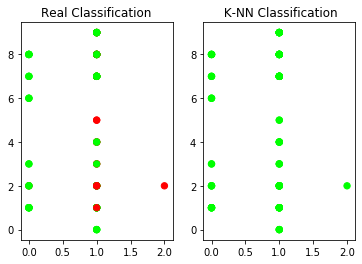

In [403]:
###################################################################

# Modelling

yPred2 = model.predict(x3)


# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x3.Age, x3.State, c=colormap[y3.Action], s=40)
plt.title('Real Classification')

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x3.Age, x3.State, c=colormap[yPred2], s=40)
plt.title(' K-NN Classification')


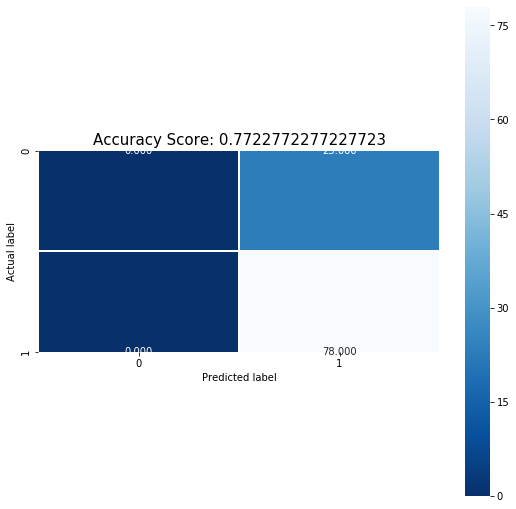

In [404]:
# Seaborn #Run at new python 3
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(sm.confusion_matrix(y3, yPred2), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(sm.accuracy_score(y3, yPred2))
plt.title(all_sample_title, size = 15);
